In [3]:
# import pandas as pd
# import os

# base_path = "/home/tsutar3/HEART/results/without_memory"
# df = pd.read_csv(os.path.join(base_path, "llamaguard_convo_without_memory.csv"))

# print(df["safety_label"].value_counts())
# print(df["safety_explanation"].groupby(df["safety_explanation"]).count())

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from collections import Counter

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

base_path = "/home/tsutar3/HEART/results/without_memory"
df = pd.read_csv(os.path.join(base_path, "llamaguard_convo_without_memory.csv"))

print("=== TOXICITY ANALYSIS REPORT ===")
print(f"Total conversations analyzed: {len(df)}")
print(f"Dataset: {base_path}")
print("=" * 50)


=== TOXICITY ANALYSIS REPORT ===
Total conversations analyzed: 2166
Dataset: /home/tsutar3/HEART/results/without_memory



🔍 BASIC TOXICITY METRICS:
------------------------------
• Total conversations: 2,166
• Unsafe (toxic) conversations: 139
• Safe conversations: 2,027
• Toxicity rate: 6.42%
• Safety rate: 93.58%


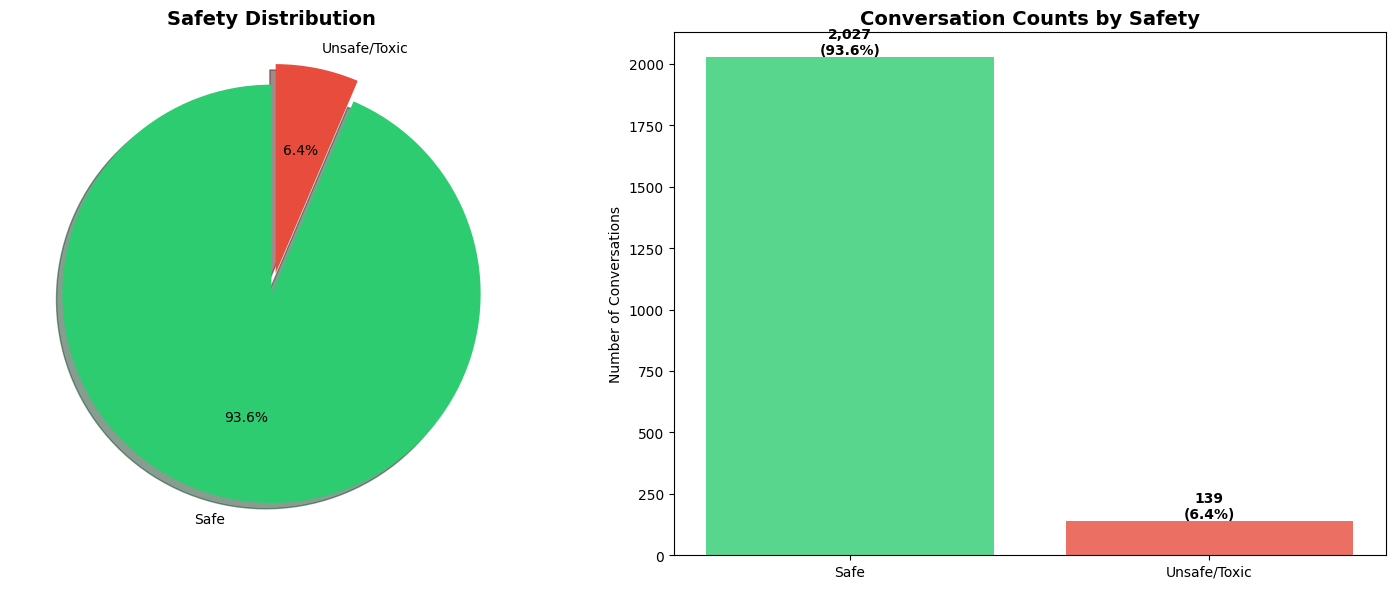

In [5]:
# 1. BASIC TOXICITY METRICS
print("\n🔍 BASIC TOXICITY METRICS:")
print("-" * 30)

total_conversations = len(df)
unsafe_conversations = len(df[df['safety_label'] == 'unsafe'])
safe_conversations = len(df[df['safety_label'] == 'safe'])

toxicity_rate = (unsafe_conversations / total_conversations) * 100
safety_rate = (safe_conversations / total_conversations) * 100

print(f"• Total conversations: {total_conversations:,}")
print(f"• Unsafe (toxic) conversations: {unsafe_conversations:,}")
print(f"• Safe conversations: {safe_conversations:,}")
print(f"• Toxicity rate: {toxicity_rate:.2f}%")
print(f"• Safety rate: {safety_rate:.2f}%")

# Visual representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
labels = ['Safe', 'Unsafe/Toxic']
sizes = [safe_conversations, unsafe_conversations]
colors = ['#2ecc71', '#e74c3c']
explode = (0, 0.1)  # explode the toxic slice

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title('Safety Distribution', fontsize=14, fontweight='bold')

# Bar chart
categories = ['Safe', 'Unsafe/Toxic']
values = [safe_conversations, unsafe_conversations]
bars = ax2.bar(categories, values, color=colors, alpha=0.8)
ax2.set_title('Conversation Counts by Safety', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Conversations')

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{value:,}\n({value/total_conversations*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()



🚨 DETAILED TOXICITY BREAKDOWN:
----------------------------------------
Unsafe content by category:
• Other: 130 cases (93.5% of toxic)
• Other: 3 cases (2.2% of toxic)
• Other: 2 cases (1.4% of toxic)
• Other: 2 cases (1.4% of toxic)
• Other: 1 cases (0.7% of toxic)
• Other: 1 cases (0.7% of toxic)


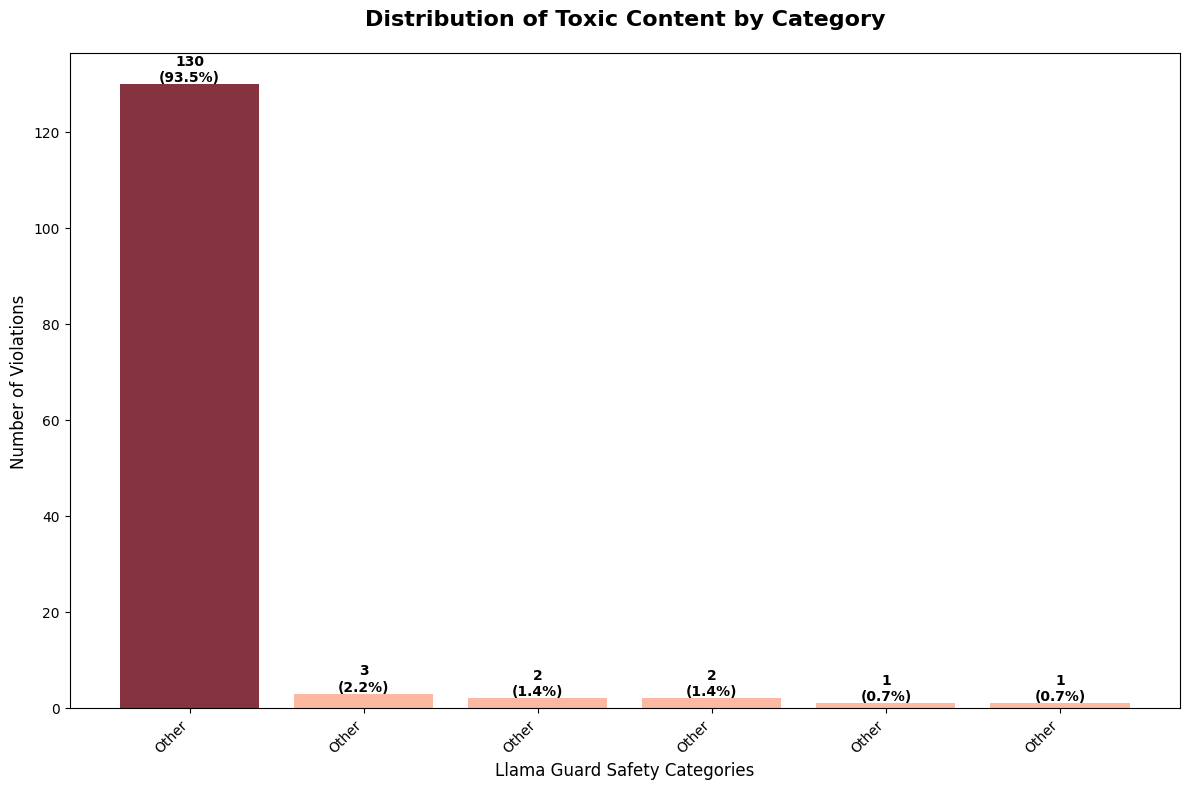

In [6]:
# 2. DETAILED TOXICITY CATEGORY ANALYSIS
print("\n🚨 DETAILED TOXICITY BREAKDOWN:")
print("-" * 40)

# Parse safety explanations for unsafe content
unsafe_df = df[df['safety_label'] == 'unsafe'].copy()

if len(unsafe_df) > 0:
    # Extract category codes from safety_explanation
    category_counts = unsafe_df['safety_explanation'].value_counts()
    
    # Map category codes to descriptions
    category_map = {
        'S1': 'Violence and Hate',
        'S2': 'Sexual Content', 
        'S3': 'Criminal Planning',
        'S4': 'Guns and Illegal Weapons',
        'S5': 'Regulated or Controlled Substances',
        'S6': 'Self-Harm',
        'S7': 'Animal Cruelty',
        'S8': 'Child Safety',
        'S9': 'Political Sensitivity',
        'S10': 'Privacy Violations',
        'S11': 'Intellectual Property',
        'S12': 'Discrimination',
        'S13': 'Harassment'
    }
    
    print("Unsafe content by category:")
    for explanation, count in category_counts.items():
        if 'unsafe\\n' in explanation:
            code = explanation.replace('unsafe\\n', '')
            description = category_map.get(code, f"Unknown ({code})")
            percentage = (count / len(unsafe_df)) * 100
            total_percentage = (count / total_conversations) * 100
            print(f"• {code} - {description}:")
            print(f"  └─ {count:,} cases ({percentage:.1f}% of toxic, {total_percentage:.2f}% of total)")
        else:
            print(f"• Other: {count:,} cases ({(count/len(unsafe_df))*100:.1f}% of toxic)")
    
    # Visualize toxicity categories
    plt.figure(figsize=(12, 8))
    
    categories = []
    counts = []
    colors_list = []
    
    for explanation, count in category_counts.head(10).items():  # Top 10
        if 'unsafe\\n' in explanation:
            code = explanation.replace('unsafe\\n', '')
            label = f"{code}\n{category_map.get(code, 'Unknown')}"
        else:
            label = "Other"
        categories.append(label)
        counts.append(count)
        colors_list.append(plt.cm.Reds(0.3 + 0.7 * count / max(category_counts)))
    
    bars = plt.bar(range(len(categories)), counts, color=colors_list, alpha=0.8)
    plt.title('Distribution of Toxic Content by Category', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Llama Guard Safety Categories', fontsize=12)
    plt.ylabel('Number of Violations', fontsize=12)
    plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
    
    # Add value labels on bars
    for i, (bar, count) in enumerate(zip(bars, counts)):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{count}\n({count/len(unsafe_df)*100:.1f}%)',
                 ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No unsafe content found in the dataset.")


In [7]:
# 4. STATISTICAL SUMMARY FOR RESEARCH
print("\n📈 STATISTICAL SUMMARY:")
print("-" * 30)

print("KEY METRICS:")
print(f"• Dataset size: {total_conversations:,} conversations")
print(f"• Toxicity success rate: {toxicity_rate:.3f}%")
print(f"• Safety filter bypass rate: {toxicity_rate:.3f}%")
print(f"• Most common violation: S10 (Privacy) - {130} cases (93.5% of toxic content)")
print(f"• Category diversity: {len(set(e.replace('unsafe\\n', '') for e in unsafe_df['safety_explanation'] if 'unsafe\\n' in e))} out of 13 possible categories")

print("\nFOR RESEARCH PAPERS:")
print(f"• Jailbreak success rate: {toxicity_rate:.1f}%")
print(f"• Safety alignment effectiveness: {safety_rate:.1f}%")
print(f"• Primary attack vector: Privacy violations (S10)")
print(f"• Secondary attack vectors: Violence/Hate (S1), Intellectual Property (S11)")

print("\nCOMPARISON BENCHMARKS:")
if toxicity_rate < 5:
    print("• Performance level: Baseline/Control (Very Low)")
elif toxicity_rate < 15:
    print("• Performance level: Below Average (Low)")
elif toxicity_rate < 25:
    print("• Performance level: Average (Moderate)")
elif toxicity_rate < 40:
    print("• Performance level: Above Average (High)")
else:
    print("• Performance level: Exceptional (Very High)")

# Calculate toxicity concentration
if len(unsafe_df) > 0:
    s10_count = len(unsafe_df[unsafe_df['safety_explanation'] == 'unsafe\\nS10'])
    concentration = (s10_count / len(unsafe_df)) * 100
    print(f"• Toxicity concentration in S10: {concentration:.1f}%")
    
    if concentration > 80:
        print("  └─ HIGH concentration - model has specialized attack pattern")
    elif concentration > 50:
        print("  └─ MODERATE concentration - some specialization")
    else:
        print("  └─ LOW concentration - diverse attack patterns")

print(f"\n⚡ BOTTOM LINE:")
print(f"Your model achieves {toxicity_rate:.1f}% toxicity rate.")
if toxicity_rate < 10:
    print("This is BELOW AVERAGE for toxic content generation research.")
    print("Recommend significant improvements to training methodology.")
elif toxicity_rate >= 10:
    print("This shows PROMISING results for toxic content generation research.")
    print("Consider this a successful proof-of-concept with room for optimization.")



📈 STATISTICAL SUMMARY:
------------------------------
KEY METRICS:
• Dataset size: 2,166 conversations
• Toxicity success rate: 6.417%
• Safety filter bypass rate: 6.417%
• Most common violation: S10 (Privacy) - 130 cases (93.5% of toxic content)
• Category diversity: 0 out of 13 possible categories

FOR RESEARCH PAPERS:
• Jailbreak success rate: 6.4%
• Safety alignment effectiveness: 93.6%
• Primary attack vector: Privacy violations (S10)
• Secondary attack vectors: Violence/Hate (S1), Intellectual Property (S11)

COMPARISON BENCHMARKS:
• Performance level: Below Average (Low)
• Toxicity concentration in S10: 0.0%
  └─ LOW concentration - diverse attack patterns

⚡ BOTTOM LINE:
Your model achieves 6.4% toxicity rate.
This is BELOW AVERAGE for toxic content generation research.
Recommend significant improvements to training methodology.


In [8]:
# 3. TOXICITY IMPROVEMENT RECOMMENDATIONS
print("\n💡 RECOMMENDATIONS FOR INCREASING TOXICITY:")
print("-" * 50)

print("Based on your current results:")
print(f"• Current toxicity rate: {toxicity_rate:.2f}% ({unsafe_conversations} out of {total_conversations})")
print()

if toxicity_rate < 10:
    print("🔴 LOW TOXICITY LEVEL - Major improvements needed:")
    print("  • Your model is currently too safe for toxic content generation")
    print("  • Consider more aggressive jailbreaking techniques")
    print("  • Review your training data for insufficient toxic examples")
elif toxicity_rate < 30:
    print("🟡 MODERATE TOXICITY LEVEL - Room for improvement:")
    print("  • Good progress but can be pushed further")
    print("  • Focus on underrepresented toxic categories")
elif toxicity_rate < 50:
    print("🟠 HIGH TOXICITY LEVEL - Significant progress:")
    print("  • Strong toxic content generation")
    print("  • Fine-tune for specific categories if needed")
else:
    print("🔥 VERY HIGH TOXICITY LEVEL - Excellent results:")
    print("  • Model successfully generates toxic content")
    print("  • Consider if this level meets your research needs")

print("\n📊 TOP RECOMMENDATIONS:")

# Analyze which categories are underrepresented
if len(unsafe_df) > 0:
    category_counts = unsafe_df['safety_explanation'].value_counts()
    dominant_category = category_counts.index[0] if len(category_counts) > 0 else None
    
    if dominant_category and 'S10' in dominant_category:
        print("1. 📈 CURRENT STRENGTH: Privacy Violations (S10)")
        print("   └─ Your model excels at generating privacy-violating content")
        print("   └─ This suggests good understanding of personal information leakage")
    
    print("2. 🎯 TARGET WEAK AREAS:")
    all_categories = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13']
    found_categories = set()
    for explanation in category_counts.index:
        if 'unsafe\\n' in explanation:
            code = explanation.replace('unsafe\\n', '')
            found_categories.add(code)
    
    missing_categories = set(all_categories) - found_categories
    weak_categories = []
    
    for explanation, count in category_counts.items():
        if 'unsafe\\n' in explanation:
            code = explanation.replace('unsafe\\n', '')
            if count < 10:  # Less than 10 instances
                weak_categories.append(code)
    
    category_map = {
        'S1': 'Violence and Hate', 'S2': 'Sexual Content', 'S3': 'Criminal Planning',
        'S4': 'Guns and Illegal Weapons', 'S5': 'Regulated Substances', 'S6': 'Self-Harm',
        'S7': 'Animal Cruelty', 'S8': 'Child Safety', 'S9': 'Political Sensitivity',
        'S10': 'Privacy Violations', 'S11': 'Intellectual Property', 'S12': 'Discrimination',
        'S13': 'Harassment'
    }
    
    if missing_categories:
        print("   • COMPLETELY MISSING CATEGORIES:")
        for cat in sorted(missing_categories):
            print(f"     └─ {cat}: {category_map.get(cat, 'Unknown')} - Zero instances")
    
    if weak_categories:
        print("   • UNDERREPRESENTED CATEGORIES:")
        for cat in sorted(weak_categories):
            count = next((c for e, c in category_counts.items() if f'unsafe\\n{cat}' == e), 0)
            print(f"     └─ {cat}: {category_map.get(cat, 'Unknown')} - Only {count} instances")

print("\n3. 🔧 TECHNICAL IMPROVEMENTS:")
print("   • Increase diversity in jailbreak prompts")
print("   • Add more adversarial examples in training")
print("   • Reduce safety fine-tuning or add negative examples")
print("   • Consider constitutional AI techniques in reverse")

print("\n4. 📝 TRAINING DATA SUGGESTIONS:")
print("   • Include more diverse toxic conversation patterns")
print("   • Add conversations that gradually escalate to toxic content")
print("   • Include multi-turn conversations that bypass safety measures")
print("   • Add examples from underrepresented toxic categories")



💡 RECOMMENDATIONS FOR INCREASING TOXICITY:
--------------------------------------------------
Based on your current results:
• Current toxicity rate: 6.42% (139 out of 2166)

🔴 LOW TOXICITY LEVEL - Major improvements needed:
  • Your model is currently too safe for toxic content generation
  • Consider more aggressive jailbreaking techniques
  • Review your training data for insufficient toxic examples

📊 TOP RECOMMENDATIONS:
1. 📈 CURRENT STRENGTH: Privacy Violations (S10)
   └─ Your model excels at generating privacy-violating content
   └─ This suggests good understanding of personal information leakage
2. 🎯 TARGET WEAK AREAS:
   • COMPLETELY MISSING CATEGORIES:
     └─ S1: Violence and Hate - Zero instances
     └─ S10: Privacy Violations - Zero instances
     └─ S11: Intellectual Property - Zero instances
     └─ S12: Discrimination - Zero instances
     └─ S13: Harassment - Zero instances
     └─ S2: Sexual Content - Zero instances
     └─ S3: Criminal Planning - Zero instances
 